In [1]:
import statsapi
import pandas as pd
import bnlearn

In [2]:
num = pd.read_csv('NatPHIL2019FromNatPers.csv')

In [3]:
stats = statsapi.get('stats', {'teamId': 120, 'stats':'sabermetrics', 'group': 'pitching', 'season': 2019})

In [4]:
#print(stats)


In [5]:
stats = stats.get('stats')[0].get('splits')[0].get('stat')
print(stats)

{'fip': 2.44805, 'fipMinus': 53.704, 'ra9War': 5.95098, 'rar': 59.5592, 'war': 6.52517}


In [6]:
#wdf = pd.DataFrame(['fip', 'war'])

In [7]:
i = 0
fipw = 9 * [0] #washington
warw = 9 * [0]
while (i < 9):
    stats = statsapi.get('stats', {'teamId': 120, 'stats':'sabermetrics', 'group': 'pitching', 'season': 2010 + i})
    fipw[i] = stats.get('stats')[0].get('splits')[0].get('stat').get('fip')
    warw[i] = stats.get('stats')[0].get('splits')[0].get('stat').get('war')
    #w[i] = stats
    i += 1
print(fipw) 
d = {'fip': fipw, 'war': warw}
wdf = pd.DataFrame(data=d)
#wdf['fip'] = fipw
#wdf['war'] = warw

[3.94797, 3.16175, 2.82376, 3.35723, 2.6815, 2.76687, 3.23853, 2.8985, 2.6535]


In [8]:
#wdf

In [10]:
i = 0 #pitsburgh pirates
fipp = 9 * [0] 
warp = 9 * [0]
while (i < 9):
    stats = statsapi.get('stats', {'teamId': 134, 'stats':'sabermetrics', 'group': 'pitching', 'season': 2010 + i})
    fipp[i] = stats.get('stats')[0].get('splits')[0].get('stat').get('fip')
    warp[i] = stats.get('stats')[0].get('splits')[0].get('stat').get('war')
    i += 1
d = {'fip': fipp, 'war': warp}
pdf = pd.DataFrame(data=d)
   # answers[['name', 'domain']] = answers['ownerEmail'].str.split('@')[2]
    

In [11]:
#pdf

In [12]:
pdf["fipo"] = wdf['fip']
pdf['waro'] = wdf['war']

In [13]:
pdf = num

In [14]:
pdf

,WinsW,Pops(A),Wops(A),Pera(D),Wera(D)
0,1,0.724,0.991,5.62,3.00
1,1,0.618,0.749,4.50,2.00
2,1,0.679,0.723,3.00,1.00
3,1,0.385,0.681,4.50,1.00
4,1,0.483,1.088,7.88,2.00
5,0,0.733,0.610,3.00,4.32
6,1,0.684,0.730,3.00,3.00
7,1,0.542,0.649,4.00,0.00
8,1,0.823,1.129,7.88,4.00
9,1,0.343,0.604,2.25,0.00


In [15]:
#ax = pdf.plot.line()

In [16]:
OPS = pdf.drop(columns = [ 'Pera(D)', 'Wera(D)'])

In [17]:
#OPS.plot.line()

### Both of the games have a linear relationship where when one team bats better the other also does better. However Washington Nats continues to outperform on the sector.

In [18]:
ERA = pdf.drop(columns = [ 'Pops(A)', 'Wops(A)'])

In [19]:
#ERA.plot.line()

### Pitching also has a relationship where one teams blunders proportionally makes the other team Worse. ERA has a negative relationship with the lower the score being better for the team. 


In [22]:
pdf['Pera(D)'] = (pdf['Pera(D)']/10 * -1 )+ 1
pdf['Wera(D)'] =  (pdf['Wera(D)']/10 * -1 )+ 1


In [23]:
pdf

,WinsW,Pops(A),Wops(A),Pera(D),Wera(D)
0,1,0.724,0.991,0.9562,0.9300
1,1,0.618,0.749,0.9450,0.9200
2,1,0.679,0.723,0.9300,0.9100
3,1,0.385,0.681,0.9450,0.9100
4,1,0.483,1.088,0.9788,0.9200
5,0,0.733,0.610,0.9300,0.9432
6,1,0.684,0.730,0.9300,0.9300
7,1,0.542,0.649,0.9400,0.9000
8,1,0.823,1.129,0.9788,0.9400
9,1,0.343,0.604,0.9225,0.9000


In [24]:
pdf['Pops(A)'] = pdf['Pops(A)'].apply(lambda x: round(10 * (x)))
pdf['Wops(A)'] = pdf['Wops(A)'].apply(lambda x: round(10 * (x)))
pdf['Pera(D)'] = pdf['Pera(D)'].apply(lambda x: round(10 * (x)))
pdf['Wera(D)'] = pdf['Wera(D)'].apply(lambda x: round(10 * (x)))


In [25]:
pdf

,WinsW,Pops(A),Wops(A),Pera(D),Wera(D)
0,1,7,10,10,9
1,1,6,7,9,9
2,1,7,7,9,9
3,1,4,7,9,9
4,1,5,11,10,9
5,0,7,6,9,9
6,1,7,7,9,9
7,1,5,6,9,9
8,1,8,11,10,9
9,1,3,6,9,9


In [26]:
#pdf.plot.line()


In [27]:
from bayespy.inference import VB

In [28]:
edges = [ 
    ('Pops(A)', 'WinsW'),
    ('Wops(A)', 'WinsW'),
    ('Pera(D)','WinsW' ),
    ('Wera(D)', 'WinsW'),
    ('Pera(D)','Wops(A)'),                                         
    ('Wera(D)', 'Pops(A)'),
]

[bnlearn] >Bayesian DAG created.
[bnlearn] >Plot based on BayesianModel


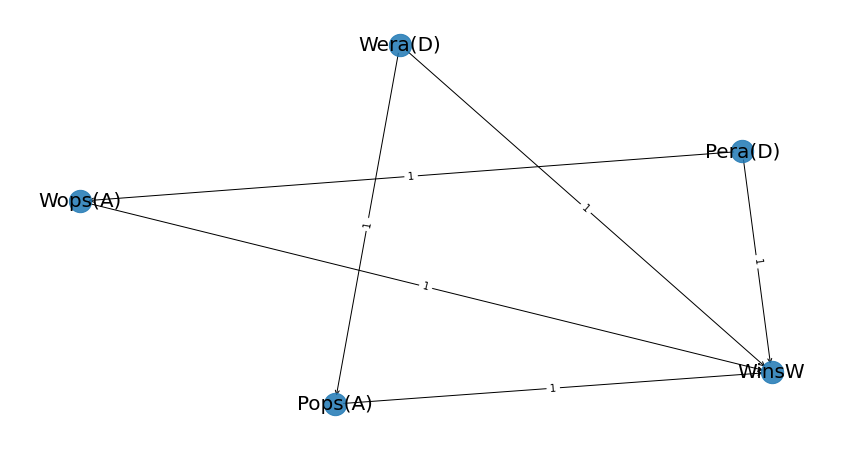

{'pos': {'Pops(A)': array([-0.33914   , -0.79685593]),
  'WinsW': array([ 0.79267253, -0.64751001]),
  'Wops(A)': array([-1.        ,  0.15762612]),
  'Pera(D)': array([0.71695375, 0.39247809]),
  'Wera(D)': array([-0.17048629,  0.89426174])},
 'G': <networkx.classes.digraph.DiGraph at 0x186ee740f40>}

In [29]:
# Structure learning
DAG = bnlearn.make_DAG(edges)
# Plot
bnlearn.plot(DAG)

In [30]:
DAG = bnlearn.parameter_learning.fit(DAG, pdf, methodtype='bayes')

[BNLEARN][PARAMETER LEARNING] Computing parameters using [bayes]
CPD of Pops(A):
+-------------+---------------------+---------------------+
| Wera(D)     | Wera(D)(9)          | Wera(D)(10)         |
+-------------+---------------------+---------------------+
| Pops(A)(3)  | 0.12354085603112841 | 0.12376237623762376 |
+-------------+---------------------+---------------------+
| Pops(A)(4)  | 0.12354085603112841 | 0.12376237623762376 |
+-------------+---------------------+---------------------+
| Pops(A)(5)  | 0.1254863813229572  | 0.12376237623762376 |
+-------------+---------------------+---------------------+
| Pops(A)(6)  | 0.12354085603112841 | 0.12376237623762376 |
+-------------+---------------------+---------------------+
| Pops(A)(7)  | 0.13326848249027237 | 0.12574257425742574 |
+-------------+---------------------+---------------------+
| Pops(A)(8)  | 0.12354085603112841 | 0.12772277227722773 |
+-------------+---------------------+---------------------+
| Pops(A)(9)  | 0.1

In [31]:
#bnlearn.print_CPD(DAG)

In [32]:
Pera = round(((9.00/10 * -1) + 1) *10)
Wera = round(((8.00/10 * -1) + 1) * 10)
#q1 = bnlearn.inference.fit(DAG, variables=['WinsW'], evidence={'Wops(A)':round(1.138 * 10), 'Pops(A)':round(0.738 * 10), 'Wera(D)': Wera,'Pera(D)': Pera})
#q1 = bnlearn.inference.fit(DAG, variables=['WinsW'], evidence={'Wops(A)':1, 'Pops(A)':0, 'Wera(D)': 1,'Pera(D)': 0})
q1 = bnlearn.inference.fit(DAG, variables=['WinsW'], evidence={'Wops(A)':round(1.138 * 10)})

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]


[bnlearn] >Variable Elimination..


Eliminating: Pera(D): 100%|█████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 114.81it/s]

+----------+--------------+
| WinsW    |   phi(WinsW) |
+==========+==============+
| WinsW(0) |       0.4903 |
+----------+--------------+
| WinsW(1) |       0.5097 |
+----------+--------------+


### SABRmetrics is the empirical analysis of baseball, especially baseball statistics that measure in-game activity. Or SABR  Society for American Baseball Research,

WAR = (Batting Runs + Base Running Runs +Fielding Runs + Positional Adjustment + League Adjustment +Replacement Runs) / (Runs Per Win)
*for pitchers it is a bit more difficult*
https://library.fangraphs.com/misc/war/

FIP- Fielding Independent Pitching (FIP) measures what a player’s ERA would look like over a given period of time if the pitcher were to have experienced league average results on balls in play and league average timing. 
FIP = ((13*HR)+(3*(BB+HBP))-(2*K))/IP + constant //hr is awful so 13 weight //BB - Walk //HBP - hit by pitch k strike out you want these. //innings pitchd 
https://library.fangraphs.com/pitching/fip/
Ra9War Runs/IP x 9

In [40]:
df = pd.DataFrame(lst)

NameError: name 'lst' is not defined

In [ ]:
a askdjflaksjdflk;asjfl